# Proyek Analisis Data: Bike Sharing Dataset (DAY.csv)
- Nama: Annisa Hukmu Akmalany
- Email: annisahukmu31@gmail.com
- Id Dicoding: aakmalany

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Apakah cuaca(wheatersit) mempengaruhi peminjaman sepeda?
- pertanyaan 2: Apakah jenis hari (holiday, weekday, workingday) mempengaruhi peminjaman sepeda?

## Menyiapkan semua library yang dibuthkan

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [98]:
#Memuat dataset DAY
day= pd.read_csv("/content/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [99]:
#Memeriksa tipe data dari tiap kolom dataset DAY
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [100]:
#Mengecek apakah ada yg duplikat di dataset DAY?
print("Jumlah duplikasi: ",day.duplicated().sum())

#Menampilkan ringkasan parameter statistik DAY
day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [101]:
#Terdapat kesalahan tipe data untuk kolom dteday pada masing-masing dataset.
#Mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

#Mengecek tipe data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore menggunakan dataset DAY

In [102]:
#melihat rangkuman parameter statistik
day.describe(include="all")

<ipython-input-102-5d1578769e7f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [103]:
#Analisis pertanyaan 1 'Apakah cuaca mempengaruhi peminjaman sepeda?'
#melihat statistik tentang jumlah peminjaman sepeda yang hubungannya dengan kolom weathersit dan temp."
result = day.groupby('weathersit')['cnt'].agg(
    count='count',
    mean='mean',
    max='max',
    min='min',
    std='std'
)
print(result)

            count         mean   max  min          std
weathersit                                            
1             463  4876.786177  8714  431  1879.483989
2             247  4035.862348  8362  605  1809.109918
3              21  1803.285714  4639   22  1240.284449


In [104]:
#Analisis pertanyaan 2 'Apakah jenis hari (hari libur, hari kerja, dan hari biasa) mempengaruhi peminjaman sepeda?'
#melihat statistik tentang jumlah peminjaman sepeda yang hubungannya dengan kolom hari libur, hari kerja, dan hari biasa."
result = day.groupby(['holiday', 'weekday', 'workingday'])['cnt'].agg(
    count='count',
    mean='mean',
    max='max',
    min='min',
    std='std'
)
print(result)


                            count         mean   max   min          std
holiday weekday workingday                                             
0       0       0             105  4228.828571  8227   605  1872.496629
        1       1              90  4398.866667  7525    22  1749.872921
        2       1             103  4544.621359  7767   683  1802.560842
        3       1             103  4520.825243  8173   441  2028.275446
        4       1             102  4720.343137  7804   431  1919.276841
        5       1             102  4718.588235  8362  1167  1881.876462
        6       0             105  4550.542857  8714   627  2196.693009
1       1       0              15  3973.666667  6370  1000  2061.976779
        2       0               1  1013.000000  1013  1013          NaN
        3       0               1  7403.000000  7403  7403          NaN
        4       0               2  1960.000000  2425  1495   657.609307
        5       0               2  3247.000000  3368  3126   171

## Visualization & Explanatory Analysis

In [105]:
#Pertanyaan 1
result = day.groupby('weathersit')['cnt'].agg(
    count='count',
    mean='mean',
    max='max',
    min='min',
    std='std'
)
result.head()

,count,mean,max,min,std
weathersit,,,,,
1,463,4876.786177,8714,431,1879.483989
2,247,4035.862348,8362,605,1809.109918
3,21,1803.285714,4639,22,1240.284449


In [106]:
#Identifikasi kondisi cuaca dengan peminjaman sepeda terbanyak
condition_max = result['count'].idxmax()
max_count = result['count'].max()

#Identifikasi kondisi cuaca dengan peminjaman sepeda paling sedikit
condition_min = result['count'].idxmin()
min_count = result['count'].min()

print(f"Peminjaman sepeda terbanyak adalah saat kondisi cuaca {condition_max} dengan jumlah {max_count} peminjaman.")
print(f"Peminjaman sepeda paling sedikit adalah saat kondisi cuaca {condition_min} dengan jumlah {min_count} peminjaman.")


Peminjaman sepeda terbanyak adalah saat kondisi cuaca 1 dengan jumlah 463 peminjaman.
Peminjaman sepeda paling sedikit adalah saat kondisi cuaca 3 dengan jumlah 21 peminjaman.


In [107]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


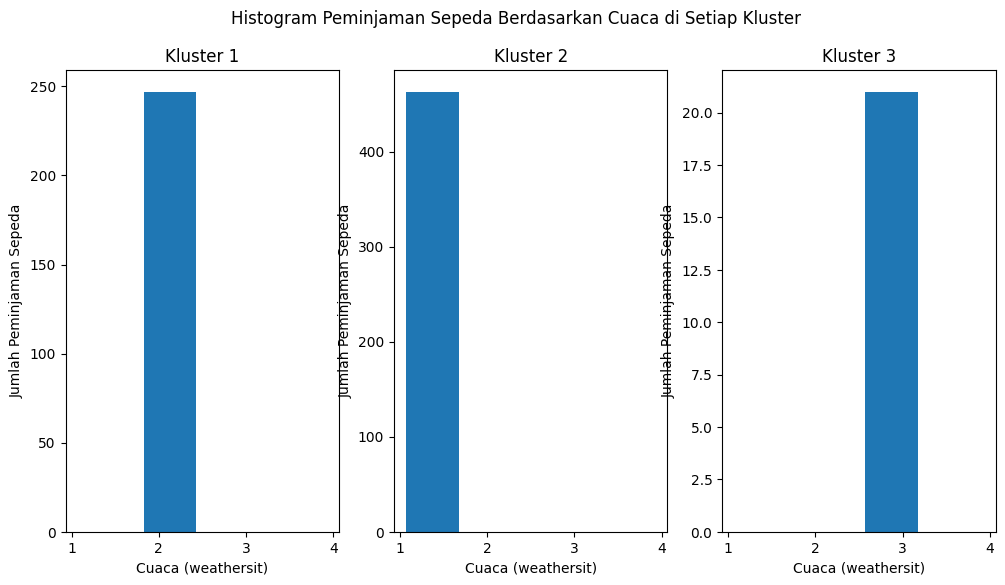

In [108]:
#Clustering
X = day[['weathersit']]

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)
day['cluster'] = kmeans.labels_

# Visualisasi histogram peminjaman sepeda berdasarkan cuaca di setiap kluster
plt.figure(figsize=(12, 6))

# Loop melalui setiap kluster
for cluster in day['cluster'].unique():
    plt.subplot(1, n_clusters, cluster + 1)
    plt.hist(day[day['cluster'] == cluster]['weathersit'], bins=4, range=(1, 4), rwidth=0.8)
    plt.xlabel('Cuaca (weathersit)')
    plt.ylabel('Jumlah Peminjaman Sepeda')
    plt.title(f'Kluster {cluster + 1}')

plt.suptitle('Histogram Peminjaman Sepeda Berdasarkan Cuaca di Setiap Kluster')
plt.show()

In [109]:
# Statistik klaster
cluster_stats = day.groupby('cluster')['weathersit'].value_counts()
print(cluster_stats)

cluster  weathersit
0        2             247
1        1             463
2        3              21
Name: weathersit, dtype: int64


In [110]:
#Pertanyaan 2
result = day.groupby(['holiday', 'weekday', 'workingday'])['cnt'].agg(
    count='count',
    mean='mean',
    max='max',
    min='min',
    std='std'
)
result.head()

count         mean   max  min          std
holiday weekday workingday                                            
0       0       0             105  4228.828571  8227  605  1872.496629
        1       1              90  4398.866667  7525   22  1749.872921
        2       1             103  4544.621359  7767  683  1802.560842
        3       1             103  4520.825243  8173  441  2028.275446
        4       1             102  4720.343137  7804  431  1919.276841

In [111]:
# Menghitung jumlah peminjaman sepeda pada hari libur (holiday)
peminjaman_holiday = day[day['holiday'] == 1]['cnt'].sum()

# Menghitung jumlah peminjaman sepeda pada hari kerja (workingday)
peminjaman_workingday = day[day['workingday'] == 1]['cnt'].sum()

# Menghitung jumlah peminjaman sepeda pada hari biasa (weekday) yang bukan hari libur dan bukan hari kerja
peminjaman_weekday = day[(day['holiday'] == 0) & (day['workingday'] == 0)]['cnt'].sum()

print(f"Jumlah peminjaman sepeda pada hari libur: {peminjaman_holiday} peminjaman")
print(f"Jumlah peminjaman sepeda pada hari kerja: {peminjaman_workingday} peminjaman")
print(f"Jumlah peminjaman sepeda pada hari biasa (bukan hari libur dan bukan hari kerja): {peminjaman_weekday} peminjaman")


Jumlah peminjaman sepeda pada hari libur: 78435 peminjaman
Jumlah peminjaman sepeda pada hari kerja: 2292410 peminjaman
Jumlah peminjaman sepeda pada hari biasa (bukan hari libur dan bukan hari kerja): 921834 peminjaman


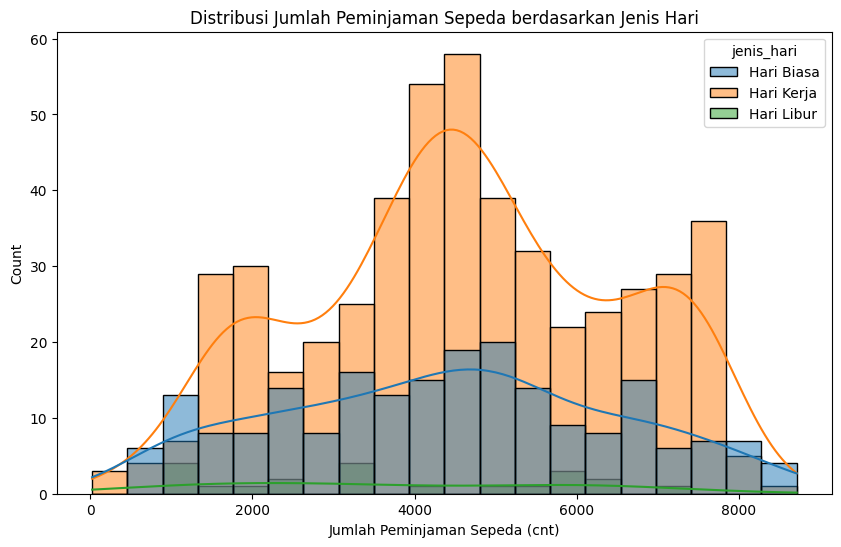

In [112]:
day['jenis_hari'] = day.apply(lambda row: 'Hari Libur' if row['holiday'] == 1 else ('Hari Kerja' if row['workingday'] == 1 else 'Hari Biasa'), axis=1)

# Menampilkan distribusi jumlah peminjaman sepeda berdasarkan jenis hari
plt.figure(figsize=(10, 6))
sns.histplot(data=day, x='cnt', hue='jenis_hari', bins=20, kde=True)
plt.xlabel('Jumlah Peminjaman Sepeda (cnt)')
plt.title('Distribusi Jumlah Peminjaman Sepeda berdasarkan Jenis Hari')
plt.show()

### Pertanyaan 1: Apakah cuaca mempengaruhi peminjaman sepeda?

In [113]:
# Statistik klaster
cluster_stats = day.groupby('cluster')['weathersit'].value_counts()
print(cluster_stats)

print('')
print("Dapat dilihat bahwa cuaca(weathersit) mempengaruhi peminjaman sepeda(cnt).")
print("Untuk Cuaca 1(Clear, Few clouds, Partly cloudy, Partly cloudy): Peminjaman sepeda 463 kali")
print("Untuk Cuaca 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist): Peminjaman sepeda 247 kali")
print("Untuk Cuaca 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds): Peminjaman sepeda 21 kali")
print("Untuk Cuaca 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog): Tidak ada peminjaman")

cluster  weathersit
0        2             247
1        1             463
2        3              21
Name: weathersit, dtype: int64

Dapat dilihat bahwa cuaca(weathersit) mempengaruhi peminjaman sepeda(cnt).
Untuk Cuaca 1(Clear, Few clouds, Partly cloudy, Partly cloudy): Peminjaman sepeda 463 kali
Untuk Cuaca 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist): Peminjaman sepeda 247 kali
Untuk Cuaca 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds): Peminjaman sepeda 21 kali
Untuk Cuaca 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog): Tidak ada peminjaman


### Pertanyaan 2: Apakah jenis hari (holiday, weekday, workingday) mempengaruhi peminjaman sepeda?

In [114]:
# Menghitung jumlah peminjaman sepeda pada hari libur (holiday)
peminjaman_holiday = day[day['holiday'] == 1]['cnt'].sum()

# Menghitung jumlah peminjaman sepeda pada hari kerja (workingday)
peminjaman_workingday = day[day['workingday'] == 1]['cnt'].sum()

# Menghitung jumlah peminjaman sepeda pada hari biasa (weekday) yang bukan hari libur dan bukan hari kerja
peminjaman_weekday = day[(day['holiday'] == 0) & (day['workingday'] == 0)]['cnt'].sum()

print(f"Jumlah peminjaman sepeda pada hari libur: {peminjaman_holiday} peminjaman")
print(f"Jumlah peminjaman sepeda pada hari kerja: {peminjaman_workingday} peminjaman")
print(f"Jumlah peminjaman sepeda pada hari biasa (bukan hari libur dan bukan hari kerja): {peminjaman_weekday} peminjaman")
print('')
print('Dapat dilihat bahwa jenis hari mempengaruhi peminjaman sepeda, dimana pada hari kerja sebanyak 2292410, hari libur 78435, dan hari biasa 921834')


Jumlah peminjaman sepeda pada hari libur: 78435 peminjaman
Jumlah peminjaman sepeda pada hari kerja: 2292410 peminjaman
Jumlah peminjaman sepeda pada hari biasa (bukan hari libur dan bukan hari kerja): 921834 peminjaman

Dapat dilihat bahwa jenis hari mempengaruhi peminjaman sepeda, dimana pada hari kerja sebanyak 2292410, hari libur 78435, dan hari biasa 921834


## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

In [115]:
print("Kesimpulan pertanyaan 1: Berdasarkan visualisasi data, cuaca (weathersit) mempengaruhi peminjaman sepeda, dimana saat cuaca 1 sepeda paling banyak dipinjam, diikuti cuaca 2, dan cuaca 3 sedikit, cuaca 4 tidak ada peminjaman sepeda.")

print("Kesimpulan pertanyaan 2: Berdasarkan visualisasi data, jenis hari mempengaruhi peminjaman sepeda. Dimana saat hari kerja peminjaman sepeda banyak dilakukan, diikuti dengan hari biasa dan hari libur.")

Kesimpulan pertanyaan 1: Berdasarkan visualisasi data, cuaca (weathersit) mempengaruhi peminjaman sepeda, dimana saat cuaca 1 sepeda paling banyak dipinjam, diikuti cuaca 2, dan cuaca 3 sedikit, cuaca 4 tidak ada peminjaman sepeda.
Kesimpulan pertanyaan 2: Berdasarkan visualisasi data, jenis hari mempengaruhi peminjaman sepeda. Dimana saat hari kerja peminjaman sepeda banyak dilakukan, diikuti dengan hari biasa dan hari libur.
